In [309]:
from lcapy import L,C,R
import sympy as sp
import numpy as np
from scipy.constants import e,pi,h
from sympy.core.mul import Mul,Pow,Add

In [310]:
class Bbox(object):
    def __init__(self, circuit, L_J = "L_J"):
        self.circuit = circuit
        self.L_J = L_J
        cir = self.circuit
        
        w = sp.Symbol('w',real=True)
        Yw = cir.Y.subs({sp.Symbol('s'):Mul(sp.I,w)})
        dY = sp.diff(Yw,sp.Symbol('w'))

        self.ws = []
        self.ks = []
        self.As = []
        self.N_modes = 0
        zeros = cir.Y.zeros()
        for w in zeros:
            w_num = complex(w.evalf(subs={i:1. for i in w.free_symbols}))
            if np.imag(w_num)>0:
                self.N_modes += 1
                self.ws.append(sp.functions.im(w))
                self.ks.append(-sp.functions.re(w))
                self.As.append(2.*e**2/h*Mul(1/sp.Symbol(L_J),Mul(Pow(1/sp.functions.im(dY.subs({sp.Symbol('w'):sp.functions.im(w)})),2),Pow(1/sp.functions.im(w),2))))



    
    def fkA(self,circuit_parameters):
        circuit_parameters['j'] = 1j
        to_return = []
        for param in [self.ws,self.ks,self.As]:
            N_param = sp.utilities.lambdify([key for key in circuit_parameters],param,"numpy")
            to_return.append(N_param(*[circuit_parameters[key] for key in circuit_parameters]))
        return [np.array(to_return[0])/2./pi,np.array(to_return[1])/2./pi,to_return[2]]

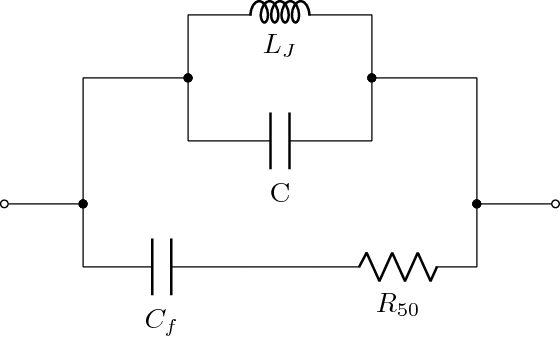

Wall time: 3.12 s


In [311]:
%%time
circuit = L('L_J') | C('C') | (C('C_f')+R('R_50'))
# circuit = L('L_J') | C('C') | (C('Cc')+(C('Cr')|L('Lr')|(C('C_f')+R('R_50'))))
circuit.draw()

In [312]:
%%time
b = Bbox(circuit)

Wall time: 2.27 s


In [313]:
%%time
b.fkA({'L_J':10e-9,'C':50e-15,'C_f':1e-15,'R_50':0.1})

Wall time: 3.69 s


[array([7.04750021e+09]), array([305.81622315]), [379808418.1779124]]